## Part 1: Exploring the data

### 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

skip_position = False
#skip_position = True

#ohe = False
ohe = True

feature_hashing = False
#feature_hashing = True

target_encoding = False
#target_encoding = True

#update = False
update = True

df = pd.read_csv('fifa_dataset.csv')
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,...,Loaned From,Contract Valid Until,Height,Weight,Finishing,HeadingAccuracy,Dribbling,Reactions,Vision,Release Clause
0,15321,D. O'Halloran,22,Republic of Ireland,59,Waterford FC,€240K,€1K,Right,1.0,...,NaN,2018,5'8,154lbs,53.0,44.0,63.0,40.0,54.0,€420K
1,15255,A. Rodríguez,22,Argentina,60,Newell's Old Boys,€350K,€3K,Right,1.0,...,NaN,2021,5'7,154lbs,62.0,43.0,57.0,61.0,58.0,€595K
2,12030,L. Collins,29,England,64,Forest Green Rovers,€350K,€4K,Right,1.0,...,NaN,2019,5'11,183lbs,44.0,62.0,55.0,62.0,51.0,€613K
3,6004,S. Riether,35,Germany,69,FC Schalke 04,€230K,€9K,Right,2.0,...,NaN,2019,5'9,159lbs,49.0,61.0,68.0,72.0,55.0,€391K
4,3429,A. Mobara,24,South Africa,72,Orlando Pirates,€3.5M,€1K,Right,1.0,...,NaN,2019,5'9,152lbs,50.0,72.0,68.0,66.0,60.0,€7.7M


In [2]:
df.shape

(2000, 27)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   Name                      2000 non-null   object 
 2   Age                       2000 non-null   int64  
 3   Nationality               2000 non-null   object 
 4   Overall                   2000 non-null   int64  
 5   Club                      1969 non-null   object 
 6   Value                     2000 non-null   object 
 7   Wage                      2000 non-null   object 
 8   Preferred Foot            1997 non-null   object 
 9   International Reputation  1997 non-null   float64
 10  Weak Foot                 1997 non-null   float64
 11  Skill Moves               1997 non-null   float64
 12  Work Rate                 1997 non-null   object 
 13  Body Type                 1997 non-null   object 
 14  Position

In [4]:
df.describe()

,Unnamed: 0,Age,Overall,International Reputation,Weak Foot,Skill Moves,Jersey Number,Finishing,HeadingAccuracy,Dribbling,Reactions,Vision
count,2000.000000,2000.00000,2000.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,9084.048500,25.11700,66.269000,1.114171,2.984477,2.383075,19.992489,46.248873,52.579369,56.174261,61.854782,53.930896
std,5263.761131,4.63811,6.906916,0.395344,0.645828,0.748394,15.922169,19.064668,17.066484,18.345184,9.012124,13.599895
min,13.000000,16.00000,47.000000,1.000000,1.000000,1.000000,1.000000,5.000000,8.000000,5.000000,21.000000,11.000000
25%,4494.750000,21.00000,62.000000,1.000000,3.000000,2.000000,9.000000,32.000000,45.000000,51.000000,56.000000,45.000000
50%,9066.500000,25.00000,66.000000,1.000000,3.000000,2.000000,18.000000,49.000000,56.000000,61.000000,62.000000,55.000000
75%,13738.250000,28.00000,71.000000,1.000000,3.000000,3.000000,26.000000,62.000000,65.000000,68.000000,68.000000,64.000000
max,18205.000000,41.00000,90.000000,4.000000,5.000000,5.000000,99.000000,93.000000,91.000000,91.000000,91.000000,92.000000


### 2

In [5]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Finishing', 'HeadingAccuracy', 'Dribbling', 'Reactions', 'Vision',
       'Release Clause'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0', 'Name', 'Nationality', 'Club', 'Jersey Number', 'Joined', 'Loaned From'], \
        axis = 1)

### 3

In [7]:
num_features = ['Age', 'Wage', 'Height', 'Weight', 'Release Clause']
cat_features = ['Preferred Foot', 'Body Type', 'Position']
ord_features = ['Overall', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Vision', \
              'Finishing', 'HeadingAccuracy', 'Dribbling', 'Reactions']
date_features = ['Contract Valid Until']

We could however try binning 'Age' and see if it improves performance.

### 4

In [8]:
def clean_num_features(my_string):
    my_string = my_string.replace('€', '')
    if 'K' in my_string:
        my_number = float(my_string.split('K')[0]) * 10 ** 3        
    if 'M' in my_string:
        my_number = float(my_string.split('M')[0]) * 10 **6
    if my_string == '0':
        my_number = float(my_string)
    return my_number

df['Value'] = df['Value'].apply(clean_num_features)
df['Wage'] = df['Wage'].apply(clean_num_features)
df['Release Clause'] = df[df['Release Clause'].notnull()]['Release Clause'].apply(clean_num_features)

df['Value'] = df['Value'].astype('float')

In [9]:
if update:
    df = df[(df['Value'] >= 20 * 10 ** 6) & (df['Value'] <= 30 * 10 ** 6) & (df['Position'] == 'ST')]

### 5

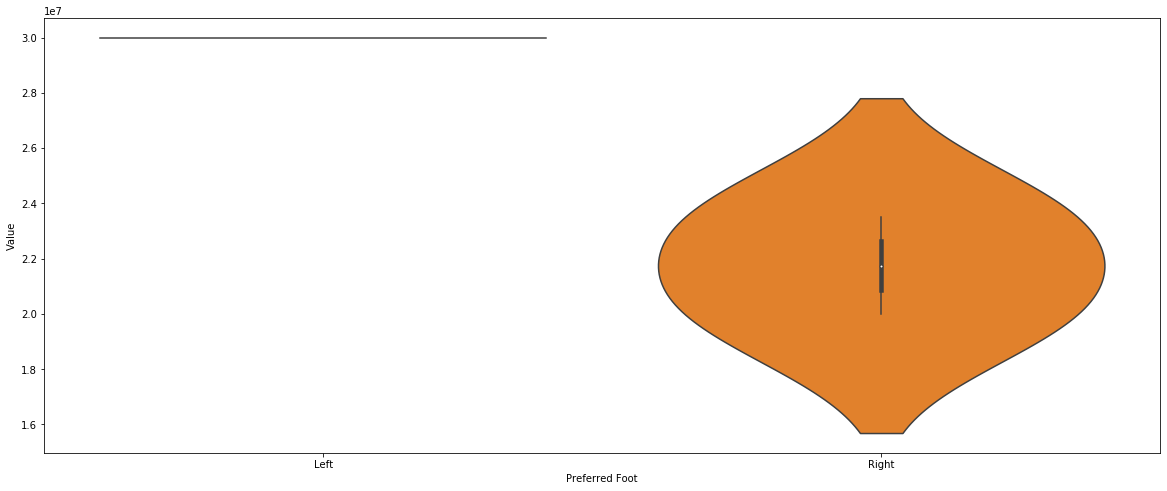

In [10]:
plt.figure(figsize = (20, 8))
sns.violinplot(x = 'Preferred Foot', y = 'Value', data = df)

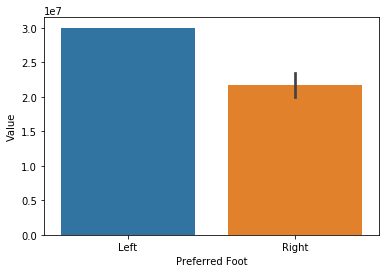

In [11]:
sns.barplot(x = 'Preferred Foot', y = 'Value', data = df, estimator = np.mean)

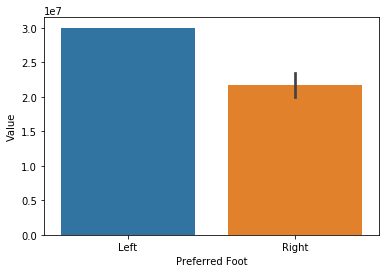

In [12]:
sns.barplot(x = 'Preferred Foot', y = 'Value', data = df, estimator = np.median)

In [13]:
right = df[df['Preferred Foot'] == 'Right']['Value']
left = df[df['Preferred Foot'] == 'Left']['Value']
print('No. right-footed players:', len(right))
print('No. left-footed players:', len(left))

alpha = 0.05 #Significance level for our tests

from scipy.stats import ttest_ind
my_ttest = ttest_ind(right, left, equal_var = False) #equal_var = False ---> We perform the Welch's t-test since the two sample size are not equal
my_ttest

No. right-footed players: 2
No. left-footed players: 1


/home/marcus/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/marcus/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

In [14]:
my_ttest.pvalue < alpha

False

We cannot reject the null hypothesis of identical average values.

In [15]:
(my_ttest.pvalue / 2 < alpha) & (my_ttest.statistic < 0)

False

We cannot reject the null hypothesis of left-footed players having higher average values.

In [16]:
from scipy.stats import median_test
my_median_test=median_test(right, left)
stat, p, med, tbl = my_median_test
my_median_test

(0.1875,
 0.6650055421020291,
 23500000.0,
 array([[0, 1],
        [2, 0]]))

In [17]:
stat < alpha

False

We cannot reject the null hypothesis of identical median values

Conclusion: we cannot conclude that left-footed players are more valuable than right-footed ones.

### 6

First we make sure we make sure that all features are presented in a suitable manner.   

In [18]:
df['Weight'] = df['Weight'].str.replace('lbs', '')

df['Height'] = df['Height'].str.split("'", expand = True).iloc[:,0].astype('float').multiply(30.48) \
.add(df['Height'].str.split("'", expand = True).iloc[:,1].astype('float').multiply(2.54))

Attack_WR = df['Work Rate'].str.split('/', expand = True).iloc[:,0]
Defense_WR = df['Work Rate'].str.split('/', expand = True).iloc[:,1].str.replace(' ', '')

my_dict = {'Low':0, 'Medium':1, 'High':2}

Attack_WR = Attack_WR.map(my_dict)
Defense_WR = Defense_WR.map(my_dict)

df['Attack_WR'] = Attack_WR
df['Defense_WR'] = Defense_WR
df = df.drop('Work Rate', axis=1)

ord_features.remove('Work Rate')
ord_features.append('Attack_WR')
ord_features.append('Defense_WR')

In order to deal with the missing values we use the strategy of filling in with the most frequent value. This method works for both strings and numerical data.

In [19]:
from sklearn.impute import SimpleImputer
most_frequent_imputer=SimpleImputer(strategy='most_frequent')
temp=most_frequent_imputer.fit_transform(df)
df=pd.DataFrame(temp, columns=df.columns)

Is this considered data leakage? Should it be performed after the train/test split?<br>
Yes, probably. 'Release Clause' is one of the more important features and its has many missing values (170/2000)

Convert into appropriate formats.

In [20]:
df[num_features]=df[num_features].astype('float')
df[cat_features]=df[cat_features].astype('category')
df[ord_features]=df[ord_features].astype('Int64')
df['Value'] = df['Value'].astype('float')

### 7

In [21]:
print(df['Preferred Foot'].unique())
print(df['Body Type'].unique())
print(df['Position'].unique())

[Left, Right]
Categories (2, object): [Left, Right]
[Lean, Normal]
Categories (2, object): [Lean, Normal]
[ST]
Categories (1, object): [ST]


Too high cardinality (26) for 'Position' for OHE. We skip this feature for now, but we could consider target encoding or feature hashing.

In [22]:
if skip_position:
    cat_features.remove('Position')

Perform the one hot encoding (ohe) on categorical features:

In [23]:
if ohe:
    ohe_df = pd.get_dummies(df[cat_features], drop_first=True)
    df = df.drop(cat_features, axis=1)
    ohe_features = list(ohe_df.columns)
    df = pd.concat([df, ohe_df], axis=1)

Perform feature hashing on categorical features. We can perform the feature hashing before the train/test split.<br><br>
From the article 'Don't be tricked by the hashing trick' we gather that n_components should be set as k^2, where k is the no. features.

In [24]:
#n_components = len(cat_features) ** 2
n_components = 4 #Slightly better performance with this choice

if feature_hashing:
    df = ce.HashingEncoder(cols = cat_features, n_components = n_components).fit_transform(df)
    
h_features = list(df.columns[:n_components])

### 8

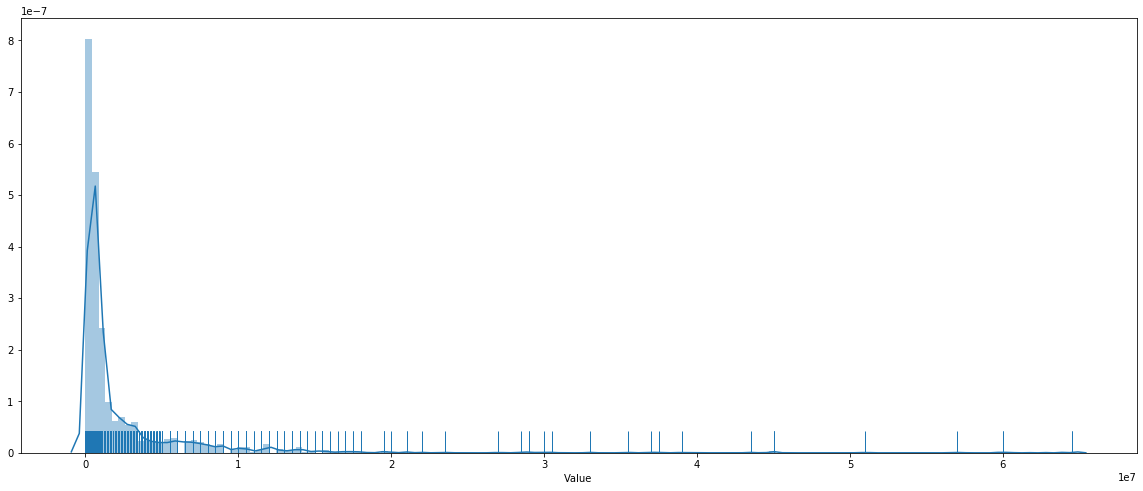

In [97]:
plt.figure(figsize = (20, 8))
sns.distplot(df['Value'], rug = True, kde = True, bins=150)

We could remove outliers to see if performance is improved.

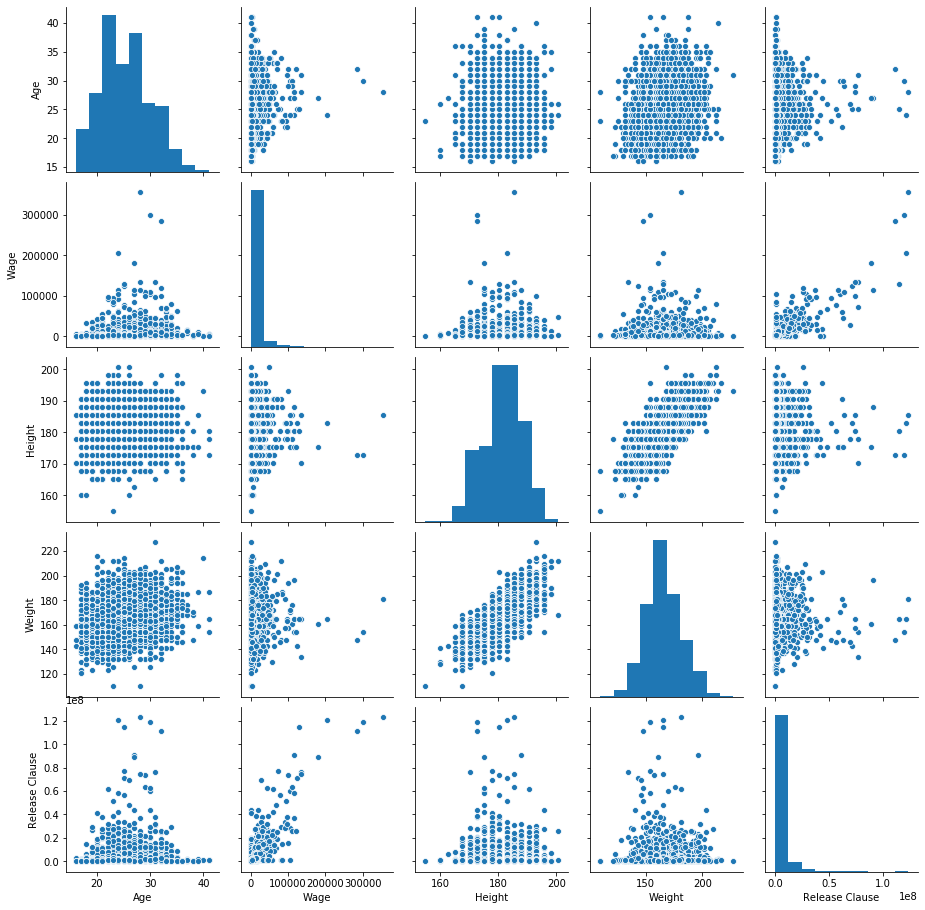

In [98]:
sns.pairplot(df[num_features])